In [2]:
#####Ke Feng 
#####DSC478 Programming Machine Learning 
#####Assginment 2 Question 3

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import tree, naive_bayes
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import export_graphviz
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
##Load the data and checking 
#load the data
am=pd.read_csv("adult_modified.csv", sep=',', na_values=["?"])
am.head()

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [3]:
#check the shape
am.shape

(10000, 8)

In [4]:
###3a.PreProcessing and Data Analysis 
##a1.check for missing values. categorical drop, numeric fill with mean 
am.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [5]:
#Fill the age misssing values with mean 
am[am.age.isnull()]
agemean = am.age.mean()
am.age.fillna(agemean, axis = 0, inplace = True)

In [12]:
#Drop the rest missing values (all in categorical value workclasss)
am.dropna(axis=0, inplace=True)

In [6]:
#Check the result 
am.shape

(10000, 8)

In [7]:
#a2.examine thecharacteristics of the attributs
am.describe(include='all')

age workclass     education marital-status   race    sex  \
count   10000.000000      9412  10000.000000          10000  10000  10000   
unique           NaN         3           NaN              2      5      2   
top              NaN   Private           NaN         Single  White   Male   
freq             NaN      6947           NaN           5017   8556   6703   
mean       38.449806       NaN     10.076600            NaN    NaN    NaN   
std        13.476503       NaN      2.548172            NaN    NaN    NaN   
min        17.000000       NaN      1.000000            NaN    NaN    NaN   
25%        28.000000       NaN      9.000000            NaN    NaN    NaN   
50%        37.000000       NaN     10.000000            NaN    NaN    NaN   
75%        47.000000       NaN     12.000000            NaN    NaN    NaN   
max        90.000000       NaN     16.000000            NaN    NaN    NaN   

        hours-per-week income  
count     10000.000000  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean         40.530300    NaN  
std          12.277197    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

In [15]:
am.dtypes #numeric (age, education, hour-per-week)

age               float64
workclass          object
education           int64
marital-status     object
race               object
sex                object
hours-per-week      int64
income             object
dtype: object

Text(0,0.5,'Frequency')

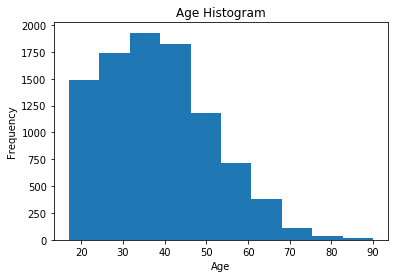

In [16]:
#Numeric Variables: plotting histogram
#age
plt.hist(am.age)
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

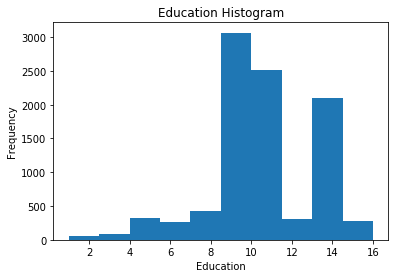

In [17]:
#education
plt.hist(am.education)
plt.title("Education Histogram")
plt.xlabel("Education")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

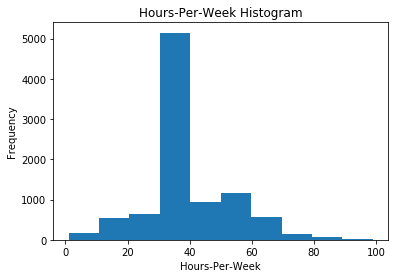

In [18]:
#hour-per-week
plt.hist('hours-per-week', data=am)
plt.title("Hours-Per-Week Histogram")
plt.xlabel("Hours-Per-Week")
plt.ylabel("Frequency")

Text(0.5,1,'Categorical Variable Bar: WorkClass')

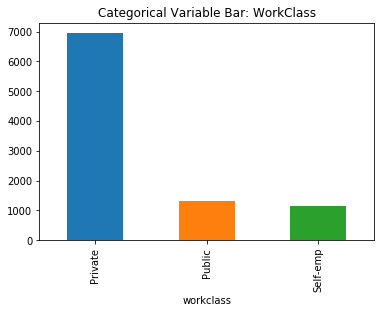

In [19]:
#Categorical Variable: plotting bar
#workclass
wc = am.groupby('workclass').size().plot(kind='bar')
wc.set_title("Categorical Variable Bar: WorkClass")

Text(0.5,1,'Categorical Variable Bar: Marital Status')

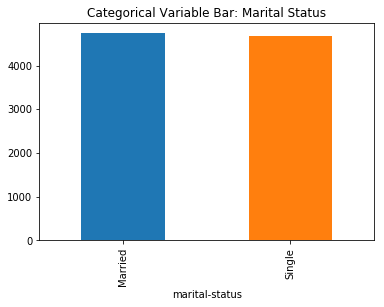

In [20]:
#marital status 
ms=am.groupby('marital-status').size().plot(kind='bar')
ms.set_title("Categorical Variable Bar: Marital Status")

Text(0.5,1,'Categorical Variable Bar: Race')

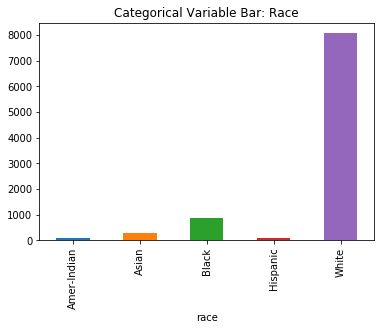

In [21]:
#race
race=am.groupby('race').size().plot(kind='bar')
race.set_title("Categorical Variable Bar: Race")

Text(0.5,1,'Categorical Variable Bar: Sex')

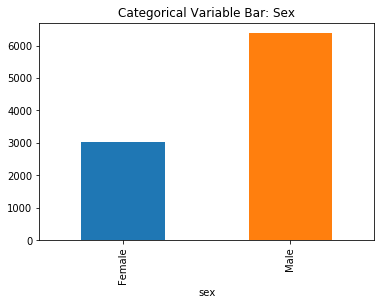

In [22]:
#sex
sex=am.groupby('sex').size().plot(kind='bar')
sex.set_title("Categorical Variable Bar: Sex")

Text(0.5,1,'Categorical Variable Bar: Income')

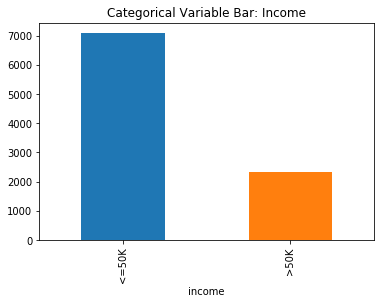

In [23]:
#income 
income=am.groupby('income').size().plot(kind='bar')
income.set_title("Categorical Variable Bar: Income")

In [24]:
#a3.Crosstabulation 
#perform cross tabulations (education +race)--er
pd.crosstab(am['education'], am['race'])

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

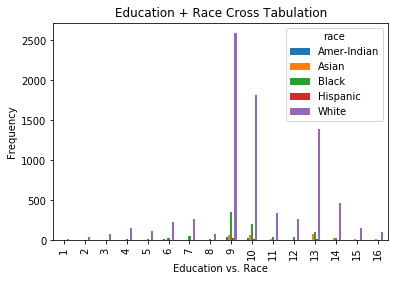

In [25]:
#er visualization
er=pd.crosstab(am['education'], am['race']).plot(kind='bar')
er.set_xlabel('Education vs. Race')
er.set_ylabel('Frequency')
er.set_title("Education + Race Cross Tabulation")
er
plt.show(er)

In [26]:
#perform cross tabulations (workclass, income)--wi
pd.crosstab(am['workclass'], am['income'])

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

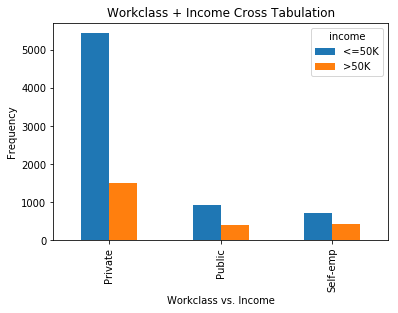

In [27]:
#wi visualization
wi=pd.crosstab(am['workclass'], am['income']).plot(kind='bar')
wi.set_xlabel('Workclass vs. Income')
wi.set_ylabel('Frequency')
wi.set_title("Workclass + Income Cross Tabulation")
wi
plt.show(wi)

In [28]:
#perform cross tabulation (workclass + race)--wr
pd.crosstab(am['workclass'], am['race'])

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

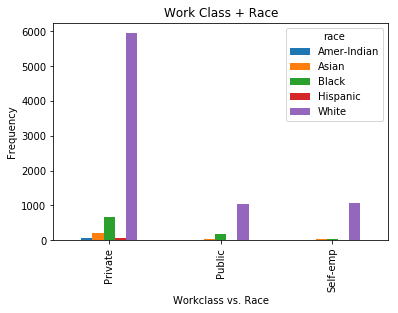

In [29]:
#wr visualization
wr=pd.crosstab(am['workclass'], am['race']).plot(kind='bar')
wr.set_xlabel('Workclass vs. Race')
wr.set_ylabel('Frequency')
wr.set_title("Work Class + Race")
plt.show(wr)

In [30]:
#perform cross tabulations (race, income)---ri
pd.crosstab(am['race'], am['income'])

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

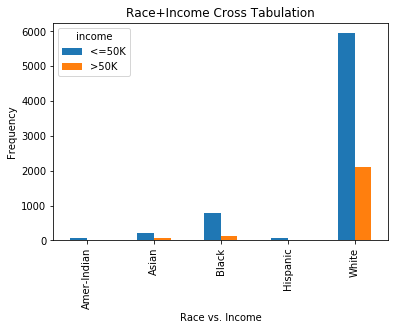

In [31]:
#ri visualization 
ri=pd.crosstab(am['race'], am['income']).plot(kind='bar')
ri.set_xlabel('Race vs. Income')
ri.set_ylabel('Frequency')
ri.set_title("Race+Income Cross Tabulation")
plt.show(ri)

In [32]:
#percentages of each race category that fall in the low-income group.
pd.crosstab(am['race'], am['income']).apply(lambda a: a/a.sum(), axis=1)

income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714

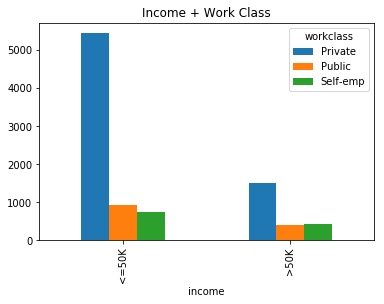

In [33]:
#a4.Show relationship between different features and income 
#income and workclass
iw=pd.crosstab(am['income'], am['workclass'])
plt.show(iw.plot(kind='bar', title='Income + Work Class'))

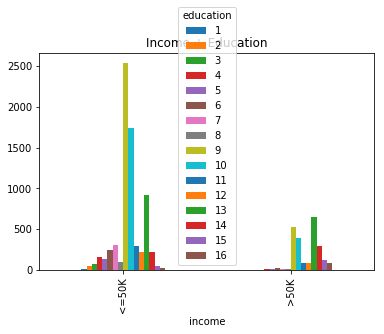

In [34]:
#income and education 
ia=pd.crosstab(am['income'], am['education'])
plt.show(ia.plot(kind='bar', title='Income + Education'))

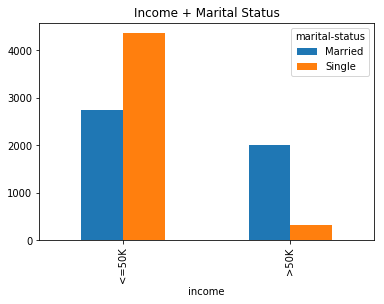

In [35]:
#income and maritalstatus
ims=pd.crosstab(am['income'], am['marital-status'])
plt.show(ims.plot(kind='bar', title='Income + Marital Status'))

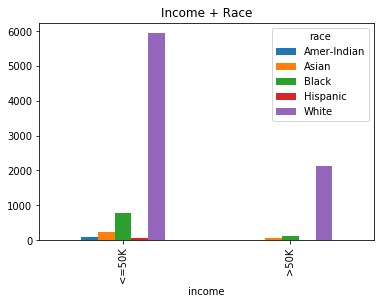

In [36]:
#income and race
ir=pd.crosstab(am['income'], am['race'])
plt.show(ir.plot(kind='bar', title='Income + Race'))

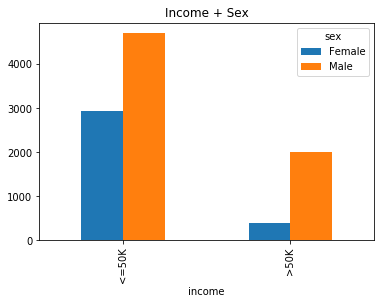

In [8]:
#Income and sex
ise=pd.crosstab(am['income'], am['sex'])
plt.show(ise.plot(kind='bar', title='Income + Sex'))

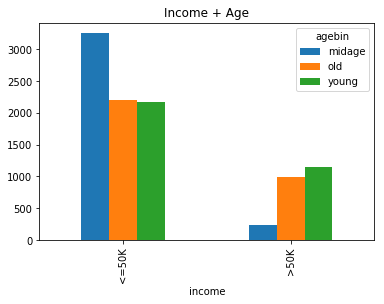

In [21]:
#Income and age
am["agebin"]=pd.qcut(am["age"], [0, 0.33, 0.66, 1], labels = ["young", "midage", "old"])
ise=pd.crosstab(am['income'], am['agebin'])
plt.show(ise.plot(kind='bar', title='Income + Age'))

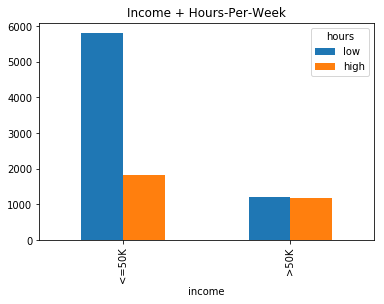

In [38]:
#Income and Work-Per-Hour
am["hours"]=pd.qcut(am['hours-per-week'], 3, labels = ["low", "high"], duplicates='drop')
ise=pd.crosstab(am['income'], am['hours'])
plt.show(ise.plot(kind='bar', title='Income + Hours-Per-Week'))

In [38]:
###3b.Predictive Modeling and Model Evaluation 
#b1.Create dummy variables, and drop target variable 
amdummy= pd.get_dummies(am[['age', 'workclass', 'education','marital-status','race','sex','hours-per-week','income']])
amdummy.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0

In [39]:
#drop income column and create feat arrays
amdummyfeat = amdummy.drop(['income_<=50K', 'income_>50K'], axis=1)
amdummyfeat.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

In [40]:
#create target array
amtarget=amdummy['income_>50K']
amtarget.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [41]:
#b2. Create three classifiers NB, DT, LDA, use 10 fold cross validation

In [42]:
#NB Classifier
nbclf = naive_bayes.GaussianNB()
nbclf.fit(amdummyfeat, amtarget)
nbscores = cross_validation.cross_val_score(nbclf, amdummyfeat, amtarget, cv = 10)
print("The scores are: %s" %nbscores)
print("The total average score is: %s" %nbscores.mean())
print("Cross Validation Range: %0.2f (+/- %0.2f)" % (nbscores.mean(), nbscores.std() * 2))

The scores are: [0.72823779 0.70488323 0.73142251 0.70456961 0.73326249 0.70669501
 0.7120085  0.7183847  0.73113709 0.70744681]
The total average score is: 0.7178047718686604
Cross Validation Range: 0.72 (+/- 0.02)


In [43]:
#Decision Tree Classifier
dtclf=tree.DecisionTreeClassifier(criterion='entropy',random_state=35)
dtclf.fit(amdummyfeat, amtarget)
dtscores = cross_validation.cross_val_score(dtclf, amdummyfeat, amtarget, cv = 10)
print("The scores are: %s" %dtscores)
print("The total average score is: %s" %dtscores.mean())
print("Cross Validation Range: %0.2f (+/- %0.2f)" % (dtscores.mean(), dtscores.std() * 2))

The scores are: [0.76433121 0.75053079 0.76751592 0.77683316 0.76089267 0.75026567
 0.75557917 0.79808714 0.77683316 0.7606383 ]
The total average score is: 0.7661507184249258
Cross Validation Range: 0.77 (+/- 0.03)


In [50]:
#LDA Classifier 
ldaclf=LDA()
ldaclf.fit(amdummyfeat, amtarget)
ldascores = cross_validation.cross_val_score(ldaclf, amdummyfeat, amtarget, cv = 10)
print("The scores are: %s" %ldascores)
print("The total average score is: %s" %ldascores.mean())
print("Cross Validation Range: %0.2f (+/- %0.2f)" % (ldascores.mean(), ldascores.std() * 2))

The scores are: [0.81210191 0.80997877 0.79193206 0.81721573 0.80977683 0.78958555
 0.79914984 0.80871413 0.82040383 0.81702128]
The total average score is: 0.8075879924057112
Cross Validation Range: 0.81 (+/- 0.02)


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables ar

In [51]:
#Create Tree visualization
import graphviz
export_graphviz(dtclf, out_file="dt.dot", feature_names = amdummyfeat.columns)  # class_names=["No", "Yes"]
with open("dt.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

In [54]:
#create a visible tree (The previous tree was too big to present, I limit the max_depth=3)
dtclf2=tree.DecisionTreeClassifier(criterion='entropy',random_state=35, max_depth=3)
dtclf2.fit(amdummyfeat, amtarget)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=35,
            splitter='best')

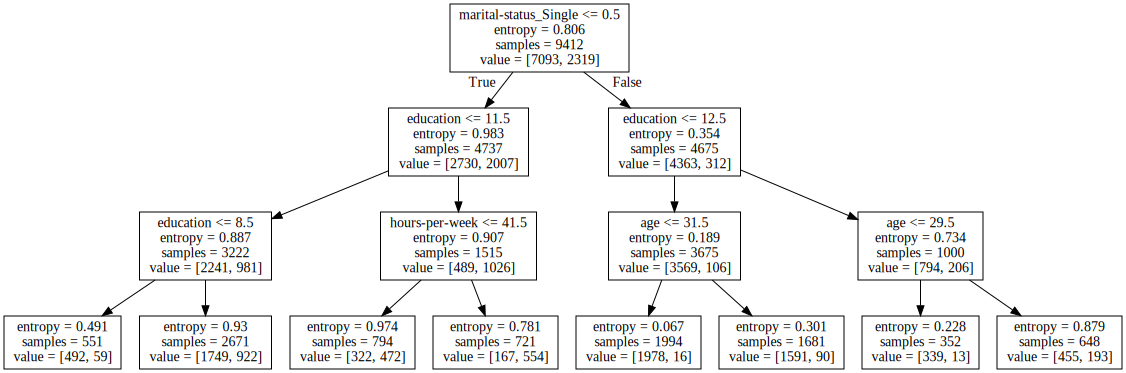

In [55]:
#Create a new tree visualization 
import graphviz
export_graphviz(dtclf2, out_file="dt2.png", feature_names = amdummyfeat.columns)  # class_names=["No", "Yes"]
with open("dt2.png") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)